# 1. Random Over-sampling

- extract at random observation of the majority class until a certain balancing ratio is reached
- it is a naive technique (requires no assamption)

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

from sklearn.datasets import make_blobs
from imblearn.over_sampling import (
    RandomOverSampler,
    SMOTE,
    ADASYN,
    BorderlineSMOTE,
    SMOTENC,
    KMeansSMOTE
)

In [147]:
# for final visualisation
res_X_dict = {}
res_y_dict = {}

### Create data

2 classes to be created, one majority one minority, clearly separated to facilitate the demonstration.

In [148]:
# Configuration options
blobs_random_seed = 42
centers = [(0, 0), (5, 5)]
cluster_std = 1.5
num_features_for_samples = 2
num_samples_total = 1600

# Generate X
X, y = make_blobs(
    n_samples=num_samples_total,
    centers=centers,
    n_features=num_features_for_samples,
    cluster_std=cluster_std)

# transform arrays to pandas formats
X = pd.DataFrame(X, columns=['VarA', 'VarB'])
y = pd.Series(y)

# create an imbalancced Xset
X = pd.concat([
    X[y == 0],
    X[y == 1].sample(200, random_state=42)
], axis=0)

y = y.loc[X.index]

# size
X.shape, y.shape

((1000, 2), (1000,))

In [149]:
X.head()

,VarA,VarB
0,-2.777245,0.188022
1,2.022116,0.931245
2,1.916920,-0.531071
4,-0.051078,1.889551
5,2.269558,-2.321860


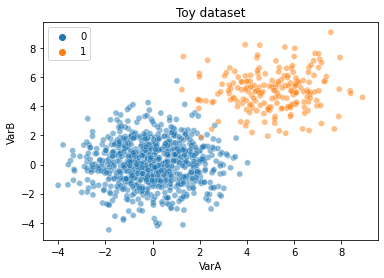

In [150]:
sns.scatterplot(
    data=X, x="VarA", y="VarB", hue=y, alpha=0.5
)

plt.title('Toy dataset')
plt.show()

### Performing Random Over-sampling

Selecting samples from the minority class at random, with replacement, until we have as many observations as those in the majority class (or any other balancing ratio we wish).

In [151]:
ros = RandomOverSampler(
    sampling_strategy='auto', 
    random_state=0,
)  

X_ros, y_ros = ros.fit_resample(X, y)

In [152]:
# size of original data

X.shape, y.shape

((1000, 2), (1000,))

In [153]:
# size of undersampled data

X_ros.shape, y_ros.shape

((1600, 2), (1600,))

In [154]:
# number of minority class observations

y.value_counts(), y_ros.value_counts()

(0    800
 1    200
 dtype: int64,
 1    800
 0    800
 dtype: int64)

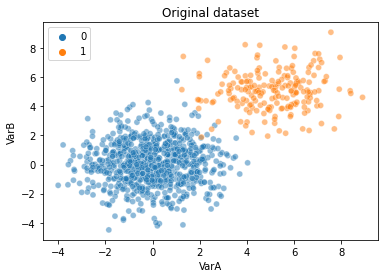

In [155]:
# plot of original data

sns.scatterplot(
    data=X, x="VarA", y="VarB", hue=y,alpha=0.5
)

plt.title('Original dataset')
plt.show()

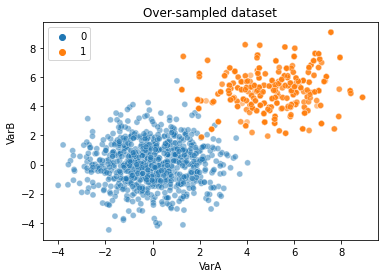

In [156]:
# plot of oversampled data

sns.scatterplot(
    data=X_ros, x="VarA", y="VarB", hue=y_ros, alpha=0.5
)

plt.title('Over-sampled dataset')
plt.show()

In [174]:
res_X_dict["X_ros"] = [X_ros]
res_y_dict["y_ros"] = [y_ros]

In [172]:
res_X_dict.clear()
res_y_dict.clear()

In [177]:
res_X_dict
res_y_dict

{'y_ros': [0       0
  1       0
  2       0
  3       0
  4       0
         ..
  1595    1
  1596    1
  1597    1
  1598    1
  1599    1
  Length: 1600, dtype: int32],
 'y_smote': [0       0
  1       0
  2       0
  3       0
  4       0
         ..
  1595    1
  1596    1
  1597    1
  1598    1
  1599    1
  Length: 1600, dtype: int32]}

# 2. SMOTE

Steps:

1. Isolate the minority class
2. Determine how many new samples need to be generated and select from which original samples the new one will be generated
3. For each chosen minority observation, find k-nearest neighbors
4. Determine the L2-distance between the observation and k-nearest neighbors
5. The distance has to be multiplied by a factor (a random number [0;1])

formula:
new sample = or_smpl - f * (or_smpl - minor_nbr)

### Performing SMOTE

In [92]:
sm = SMOTE(
    sampling_strategy='auto',
    random_state=0,
    k_neighbors=5,
    n_jobs=4
)

X_smote, y_smote = sm.fit_resample(X, y)

In [93]:
# size of original data

X.shape, y.shape

((1000, 2), (1000,))

In [94]:
# size of undersampled data

X_smote.shape, y_smote.shape

((1600, 2), (1600,))

In [95]:
# number of minority class observations

y.value_counts(), y_smote.value_counts()

(0    800
 1    200
 dtype: int64,
 1    800
 0    800
 dtype: int64)

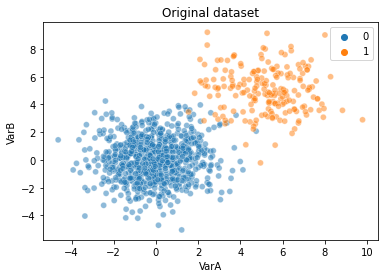

In [96]:
# plot of original data

sns.scatterplot(
    data=X, x="VarA", y="VarB", hue=y, alpha=0.5
)

plt.title('Original dataset')
plt.show()

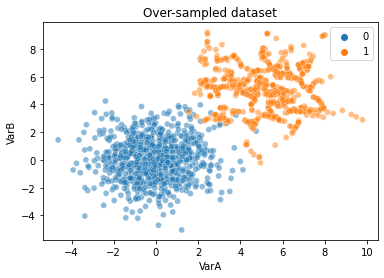

In [97]:
# plot of oversampled data

sns.scatterplot(
    data=X_smote, x="VarA", y="VarB", hue=y_smote, alpha=0.5
)

plt.title('Over-sampled dataset')
plt.show()

In [176]:
res_X_dict["X_smote"] = [X_smote]
res_y_dict["y_smote"] = [y_smote]

# 3. SMOTE-NC

- extands the functunality of SMOTE to categorical variables (ADASYN cannot do this)

having a categorical feature (column):
1. from all numerical features, calculate median(sum(std(all numerical features)))
2. proceed with SMOTE putting this median value as an L2-distance between feature values 
3. when putting the new-generated sample to the place, assign the most frequent categorical feature values to it


In [106]:
# Configuration options
blobs_random_seed = 42
centers = [(0, 0), (5, 5)]
cluster_std = 1.5
num_features_for_samples = 2
num_samples_total = 1600

# Generate X
X, y = make_blobs(
    n_samples=num_samples_total,
    centers=centers,
    n_features=num_features_for_samples,
    cluster_std=cluster_std)

# transform arrays to pandas formats
X = pd.DataFrame(X, columns=['VarA', 'VarB'])
y = pd.Series(y)

# add categorical features
rng = np.random.RandomState(42)
X['VarC'] = rng.choice(['A', 'B', 'C'], size=num_samples_total).astype(object)
X['VarD'] = rng.choice(['Blue', 'Green', 'Red'], size=num_samples_total).astype(object)

# create an imbalancced Xset
X = pd.concat([
    X[y == 0],
    X[y == 1].sample(200, random_state=42)
], axis=0)

y = y.loc[X.index]

# size
X.shape, y.shape

((1000, 4), (1000,))

In [107]:
X.head()

,VarA,VarB,VarC,VarD
0,-2.363350,2.609630,C,Green
1,0.095477,0.792291,A,Blue
4,1.799982,-0.591332,A,Blue
5,2.005415,-3.500781,A,Green
6,0.794187,1.237633,C,Green


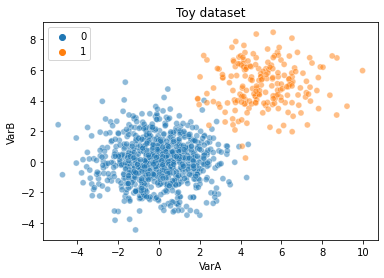

In [108]:
sns.scatterplot(
    data=X, x="VarA", y="VarB", hue=y, alpha=0.5
)

plt.title('Toy dataset')
plt.show()

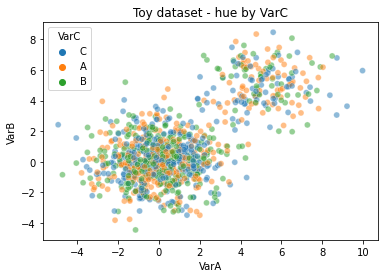

In [109]:
sns.scatterplot(
    data=X, x="VarA", y="VarB", hue='VarC', alpha=0.5
)

plt.title('Toy dataset - hue by VarC')
plt.show()

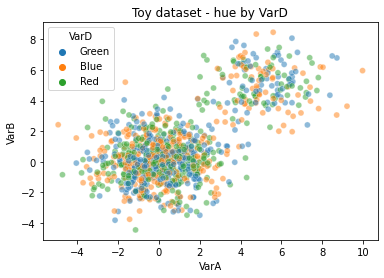

In [110]:
sns.scatterplot(
    data=X, x="VarA", y="VarB", hue='VarD', alpha=0.5
)

plt.title('Toy dataset - hue by VarD')
plt.show()

### Performing SMOTE-NC

In [114]:
smnc = SMOTENC(
    sampling_strategy='auto', 
    random_state=0, 
    k_neighbors=5,
    n_jobs=4,
    categorical_features=[2,3] # indeces of the columns of categorical variables
)  

X_smotenc, y_smotenc = smnc.fit_resample(X, y)

In [115]:
# size of original data

X.shape, y.shape

((1000, 4), (1000,))

In [116]:
# size of undersampled data

X_smotenc.shape, y_smotenc.shape

((1600, 4), (1600,))

In [117]:
# number of minority class observations

y.value_counts(), y_smotenc.value_counts()

(0    800
 1    200
 dtype: int64,
 1    800
 0    800
 dtype: int64)

In [118]:
X.tail()

,VarA,VarB,VarC,VarD
178,2.987920,3.568564,A,Blue
1324,7.223168,5.261391,A,Red
352,4.755549,4.607618,C,Green
1582,4.474270,6.250714,C,Green
1112,5.596920,4.128026,C,Blue


In [119]:
X_smotenc.tail()

,VarA,VarB,VarC,VarD
1595,6.892548,4.922215,C,Blue
1596,6.048870,4.083407,B,Green
1597,3.891994,3.963019,C,Blue
1598,7.154863,5.285918,A,Red
1599,8.147803,6.761106,B,Red


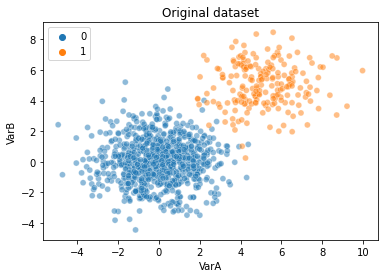

In [120]:
# plot of original data

sns.scatterplot(
    data=X, x="VarA", y="VarB", hue=y,alpha=0.5
)

plt.title('Original dataset')
plt.show()

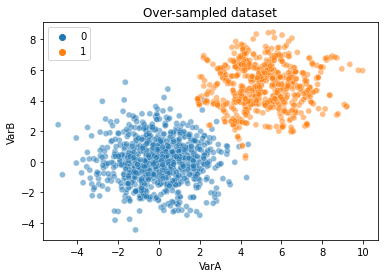

In [121]:
# plot of oversampled data

sns.scatterplot(
    data=X_smotenc, x="VarA", y="VarB", hue=y_smotenc, alpha=0.5
)

plt.title('Over-sampled dataset')
plt.show()

# 4. Borderline-SMOTE

- create new sample only from the original observations that are the closets to the borderline with the majority class

1. fit KNN with all dataset
2. find and ignore observations from the minority class which K-ns belongs to the majority class (noise and irrelevant)
3. find and ignore observations from the minority class if most of their neighbors are from the minority class (safe and easy to classify) 
4. Select the observations of the minority class if most of their neighbors are from the majority class
5. fit KNN to the minority class observations 

Next - division into 2 variants:<br>
variant 1: as a regular SMOTE, a new sample to be between original observations of the minority class <br>
variant 2: a new sample to be between original observations of the majority class

### Create data

In [123]:
# Configuration options
blobs_random_seed = 42
centers = [(0, 0), (5, 5)]
cluster_std = 1.5
num_features_for_samples = 2
num_samples_total = 1600

# Generate X
X, y = make_blobs(
    n_samples=num_samples_total,
    centers=centers,
    n_features=num_features_for_samples,
    cluster_std=cluster_std)

# transform arrays to pandas formats
X = pd.DataFrame(X, columns=['VarA', 'VarB'])
y = pd.Series(y)

# create an imbalancced Xset
X = pd.concat([
    X[y == 0],
    X[y == 1].sample(200, random_state=42)
], axis=0)

y = y.loc[X.index]

# display size
X.shape, y.shape

((1000, 2), (1000,))

### Performing BorderlineSMOTE

In [124]:
sm_b1 = BorderlineSMOTE(
    sampling_strategy='auto',
    random_state=0, 
    k_neighbors=5,
    m_neighbors=10,
    kind='borderline-1',
    n_jobs=4
)

X_smote_b1, y_smote_b1 = sm_b1.fit_resample(X, y)

In [125]:
sm_b2 = BorderlineSMOTE(
    sampling_strategy='auto',
    random_state=0,
    k_neighbors=5,
    m_neighbors=10,
    kind='borderline-2',
    n_jobs=4
)

X_smote_b2, y_smote_b2 = sm_b2.fit_resample(X, y)

In [126]:
# size of original data

X.shape, y.shape

((1000, 2), (1000,))

In [127]:
# size of undersampled data

X_smote_b1.shape, y_smote_b1.shape

((1600, 2), (1600,))

In [128]:
# size of undersampled data

X_smote_b2.shape, y_smote_b2.shape

((1599, 2), (1599,))

In [129]:
# number of minority class observations

y.value_counts(), y_smote_b1.value_counts(), y_smote_b2.value_counts()

(0    800
 1    200
 dtype: int64,
 1    800
 0    800
 dtype: int64,
 0    800
 1    799
 dtype: int64)

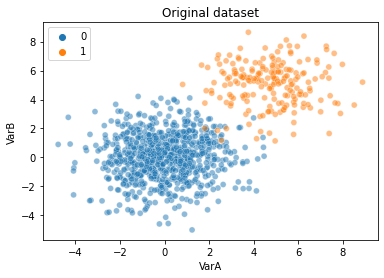

In [130]:
# plot of original data

sns.scatterplot(
    data=X, x="VarA", y="VarB", hue=y,alpha=0.5
)

plt.title('Original dataset')
plt.show()

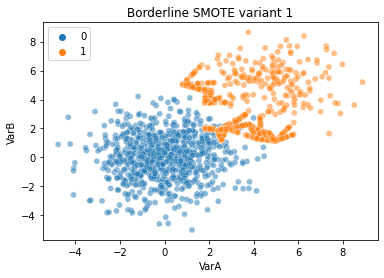

In [131]:
# plot of oversampled data

sns.scatterplot(
    data=X_smote_b1, x="VarA", y="VarB", hue=y_smote_b1, alpha=0.5
)

plt.title('Borderline SMOTE variant 1')
plt.show()

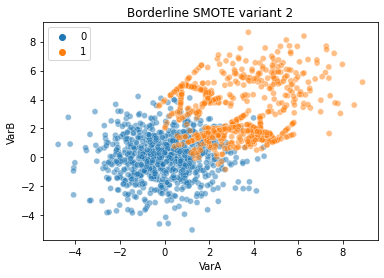

In [132]:
# plot of oversampled data

sns.scatterplot(
    data=X_smote_b2, x="VarA", y="VarB", hue=y_smote_b2, alpha=0.5
)

plt.title('Borderline SMOTE variant 2')
plt.show()

# 5. K Means-SMOTE

- for clusters 

1. determine clusters --  K-means algorithms to the whole dataset
2. select clusters where the % of the minority classes is above a threshold (typically 0.5)
3. weight the cluster -- how many new samples to create in each cluster<br>
     L2mean = Mean L2 between minority observations<br>
     density  =  (number of minority observations / L2mean) * number of feature<br>
     sparsity = 1 / density <br>
     cluster sparsity = sparsity /  sum()<br>
4. calculate the number of the synthetic samples to be generated for each cluster:<br>
     g(i) = cs(i) * G, where  <br>
                             cs(i) = cluster sparsity, 
                             G = total num of samples to generate, 
                             g(i) = num of samples to generate from cluster i

### Create data

In [133]:
# Configuration options
blobs_random_seed = 42
centers = [(0, 0), (5, 5), (0,5)]
cluster_std = 1.5
num_features_for_samples = 2
num_samples_total = 2100

# Generate X
X, y = make_blobs(
    n_samples=num_samples_total,
    centers=centers,
    n_features=num_features_for_samples,
    cluster_std=cluster_std)

# transform arrays to pandas formats
X = pd.DataFrame(X, columns=['VarA', 'VarB'])
y = pd.Series(y)

# different number of samples per blob
X = pd.concat([
    X[y == 0],
    X[y == 1].sample(400, random_state=42),
    X[y == 2].sample(100, random_state=42)
], axis=0)

y = y.loc[X.index]

# reset indexes
X.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)

             
# create imbalanced target
y = pd.concat([
    pd.Series(np.random.binomial(1, 0.3, 700)),
    pd.Series(np.random.binomial(1, 0.2, 400)),
    pd.Series(np.random.binomial(1, 0.1, 100)),
], axis=0).reset_index(drop=True)

# display size
X.shape, y.shape

((1200, 2), (1200,))

In [134]:
y.value_counts()

0    871
1    329
dtype: int64

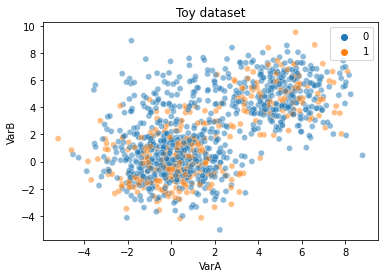

In [135]:
sns.scatterplot(
    data=X, x="VarA", y="VarB", hue=y, alpha=0.5
)

plt.title('Toy dataset')
plt.show()

### Performing K Means SMOTE

In [136]:
sm = KMeansSMOTE(
    sampling_strategy='auto',
    random_state=0,
    k_neighbors=2,
    n_jobs=None,
    kmeans_estimator=KMeans(n_clusters=3, random_state=0),
    cluster_balance_threshold=0.1,
    density_exponent='auto'
)

X_kmsmote, y_kmsmote = sm.fit_resample(X, y)

In [137]:
# size of original data

X.shape, y.shape

((1200, 2), (1200,))

In [138]:
# size of undersampled data

X_kmsmote.shape, y_kmsmote.shape

((1744, 2), (1744,))

In [139]:
# number of minority class observations

y.value_counts(), y_kmsmote.value_counts()

(0    871
 1    329
 dtype: int64,
 1    873
 0    871
 dtype: int64)

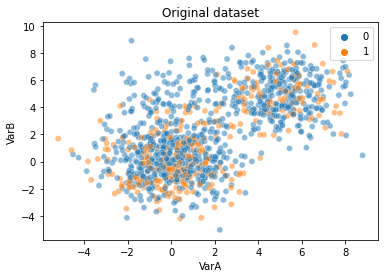

In [140]:
# plot of original data

sns.scatterplot(
    data=X, x="VarA", y="VarB", hue=y,alpha=0.5
)

plt.title('Original dataset')
plt.show()

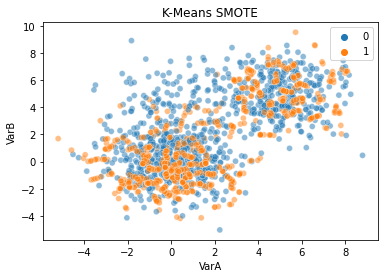

In [141]:
# plot of oversampled data

sns.scatterplot(
    data=X_kmsmote, x="VarA", y="VarB", hue=y_kmsmote, alpha=0.5
)

plt.title('K-Means SMOTE')
plt.show()

# 6. ADASYN

- synthetic data is more generated from all observations that are harder to classify
 (this is the main difference beetwen this one and SMOTE)

1. determine the balancing ratio: X(minority) / X(majority)
2. determine the number og samples to generate:
      G = ( X(majority) - X(minority) ) * factor
3. train KNN using the entire dataset to find closest K-ns for each observation of minority class
4. determine the weighting r: D/K, where D = neighbors from the majority class, K = neighbors
5. normalize r: r/sum(r-s)
6. calculate the number of the synthetic samples to be generated for each observation of minority class:
     g(i) = r(i) * G, where  
                             r(i) = weight for observation i, 
                             G = total num of samples to generate, 
                             g(i) = num of samples to generate from observation i
7. for each minority class x(i) generate g(i) synthetic samples

formula:<br>
new sample = or_smpl - f * (or_smpl - any_nbr)

### Create data

In [67]:
# Configuration options
blobs_random_seed = 42
centers = [(0, 0), (5, 5)]
cluster_std = 1.5
num_features_for_samples = 2
num_samples_total = 1600

# Generate X
X, y = make_blobs(
    n_samples=num_samples_total,
    centers=centers,
    n_features=num_features_for_samples,
    cluster_std=cluster_std)

# transform arrays to pandas formats
X = pd.DataFrame(X, columns=['VarA', 'VarB'])
y = pd.Series(y)

# create an imbalancced Xset
X = pd.concat([
    X[y == 0],
    X[y == 1].sample(200, random_state=42)
], axis=0)

y = y.loc[X.index]

# display size
X.shape, y.shape

((1000, 2), (1000,))

### Performing ADASYN

In [68]:
ada = ADASYN(
    sampling_strategy='auto',
    random_state=0,
    n_neighbors=5,
    n_jobs=4
)

X_adsn, y_adsn = ada.fit_resample(X, y)

In [69]:
# size of original data

X.shape, y.shape

((1000, 2), (1000,))

In [70]:
# size of undersampled data

X_adsn.shape, y_adsn.shape

((1597, 2), (1597,))

In [71]:
# number of minority class observations

y.value_counts(), y_adsn.value_counts()

(0    800
 1    200
 dtype: int64,
 0    800
 1    797
 dtype: int64)

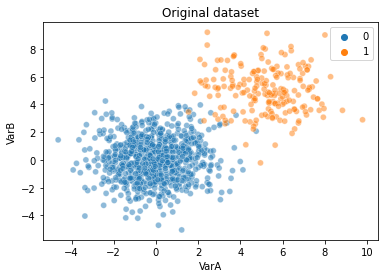

In [72]:
# plot of original data

sns.scatterplot(
    data=X, x="VarA", y="VarB", hue=y,alpha=0.5
)

plt.title('Original dataset')
plt.show()

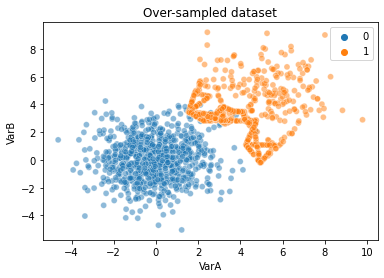

In [73]:
# plot of original data

sns.scatterplot(
    data=X_adsn, x="VarA", y="VarB", hue=y_adsn, alpha=0.5
)

plt.title('Over-sampled dataset')
plt.show()

# 7. Comparing Oversampling Techniques 